<a href="https://colab.research.google.com/github/RonnyGuevara/PROJECTS_2022/blob/main/ANSIEDAD/Ansiedad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ansiedad

In [1]:
#Lectura de librerías
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Montamos el drive para lectura de la data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Lectura de la data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ANSIEDAD.xlsx')
df.head(10) #Esta función devuelve las primeras n filas del objeto se según la posición.

,Me siento bien,Me canso rápidamente,Siento ganas de llorar,Quisiera ser más feliz,Me pierdo cosas por no poder decidirme rápidamente,Me siento descansado/a,"Soy una persona ""tranquila, serena y relajado/a""",Siento que las dificultades se amontonan al punto de no poder soportarlas,Me preocupo demasiado por cosas sin importancia,Soy feliz,Me inclino a tomar las cosas muy a pecho,Me falta confianza en mi mismo/a,Me siento seguro/a,Trato de evitar enfrentar una crisis o dificultad,Me siento melancólico/a,Estoy satisfecho/a,Algunas ideas poco importantes pasan por mi mente,Me afectan tanto los desengaños que no me los puedo sacar de la cabeza,Soy una persona estable,Cuando pienso en los asuntos que tengo que resolver me pongo tenso/a y alterado/a
0,3,0,0,0,0,2,2,1,0,3,2,2,1,0,1,2,1,0,2,1
1,2,1,0,0,0,1,2,0,0,2,3,0,3,2,0,3,1,0,2,2
2,2,1,1,2,0,2,2,1,2,2,1,1,2,1,1,2,1,0,2,2
3,1,2,1,2,1,0,0,3,3,2,3,3,1,1,1,1,2,1,1,2
4,2,1,0,0,1,2,3,0,1,3,0,1,3,0,0,2,1,0,3,1
5,3,1,1,1,0,1,1,1,1,3,1,1,2,1,0,2,1,0,2,1
6,2,0,1,0,0,3,2,1,1,3,0,0,3,3,1,1,1,1,3,3
7,3,1,0,3,3,3,2,3,3,3,3,3,2,0,1,3,0,3,3,2
8,1,1,3,1,0,1,2,1,1,1,0,0,1,0,0,1,0,0,2,0
9,3,2,1,0,0,1,3,0,0,3,0,0,3,0,1,3,1,0,3,0


In [4]:
#Imprime los atributos
df.columns

Index(['Me siento bien', 'Me canso rápidamente ', 'Siento ganas de llorar',
       'Quisiera ser más feliz',
       'Me pierdo cosas por no poder decidirme rápidamente',
       'Me siento descansado/a',
       'Soy una persona "tranquila, serena y relajado/a"',
       'Siento que las dificultades se amontonan al punto de no poder soportarlas',
       'Me preocupo demasiado por cosas sin importancia', 'Soy feliz',
       'Me inclino a tomar las cosas muy a pecho',
       'Me falta confianza en mi mismo/a', 'Me siento seguro/a',
       'Trato de evitar enfrentar una crisis o dificultad',
       'Me siento melancólico/a', 'Estoy satisfecho/a',
       'Algunas ideas poco importantes pasan por mi mente',
       'Me afectan tanto los desengaños que no me los puedo sacar de la cabeza',
       'Soy una persona estable',
       'Cuando pienso en los asuntos que tengo que resolver me pongo tenso/a y alterado/a'],
      dtype='object')

In [5]:
df.corr()

,Me siento bien,Me canso rápidamente,Siento ganas de llorar,Quisiera ser más feliz,Me pierdo cosas por no poder decidirme rápidamente,Me siento descansado/a,"Soy una persona ""tranquila, serena y relajado/a""",Siento que las dificultades se amontonan al punto de no poder soportarlas,Me preocupo demasiado por cosas sin importancia,Soy feliz,Me inclino a tomar las cosas muy a pecho,Me falta confianza en mi mismo/a,Me siento seguro/a,Trato de evitar enfrentar una crisis o dificultad,Me siento melancólico/a,Estoy satisfecho/a,Algunas ideas poco importantes pasan por mi mente,Me afectan tanto los desengaños que no me los puedo sacar de la cabeza,Soy una persona estable,Cuando pienso en los asuntos que tengo que resolver me pongo tenso/a y alterado/a
Me siento bien,1.000000,-0.231351,-0.422798,-0.291595,-0.194618,0.353762,0.370101,-0.487576,-0.408101,0.568006,-0.224960,-0.324259,0.333063,-0.222475,-0.388645,0.585297,-0.169072,-0.280472,0.423179,-0.224651
Me canso rápidamente,-0.231351,1.000000,0.320639,0.357272,0.259433,-0.412080,-0.319188,0.340950,0.446065,-0.347795,0.307843,0.259822,-0.253531,0.124296,0.403921,-0.147703,0.184153,0.248486,-0.364165,0.221924
Siento ganas de llorar,-0.422798,0.320639,1.000000,0.421089,0.345234,-0.352961,-0.194803,0.612990,0.464654,-0.500692,0.184260,0.481134,-0.340651,0.099022,0.564945,-0.354740,0.239895,0.258333,-0.441862,0.204119
Quisiera ser más feliz,-0.291595,0.357272,0.421089,1.000000,0.362307,-0.298895,-0.213981,0.467887,0.405243,-0.426024,0.352823,0.466107,-0.254221,0.026997,0.403936,-0.248018,0.126383,0.220237,-0.395816,0.159737
Me pierdo cosas por no poder decidirme rápidamente,-0.194618,0.259433,0.345234,0.362307,1.000000,-0.085608,-0.019828,0.310520,0.348378,-0.267192,0.195907,0.503798,-0.266160,0.279392,0.421640,-0.241035,0.156533,0.435547,-0.333118,0.310858
Me siento descansado/a,0.353762,-0.412080,-0.352961,-0.298895,-0.085608,1.000000,0.352010,-0.388775,-0.294170,0.507078,-0.300078,-0.298184,0.385529,-0.034641,-0.355008,0.257544,-0.115067,-0.173601,0.443429,-0.206686
"Soy una persona ""tranquila, serena y relajado/a""",0.370101,-0.319188,-0.194803,-0.213981,-0.019828,0.352010,1.000000,-0.293719,-0.447189,0.450216,-0.315178,-0.194096,0.319005,-0.076625,-0.246505,0.372953,-0.285675,-0.288634,0.473841,-0.235454
Siento que las dificultades se amontonan al punto de no poder soportarlas,-0.487576,0.340950,0.612990,0.467887,0.310520,-0.388775,-0.293719,1.000000,0.696316,-0.493030,0.398120,0.571486,-0.382998,0.079641,0.485367,-0.375149,0.236954,0.337328,-0.402052,0.478825
Me preocupo demasiado por cosas sin importancia,-0.408101,0.446065,0.464654,0.405243,0.348378,-0.294170,-0.447189,0.696316,1.000000,-0.419669,0.568987,0.574876,-0.374103,0.143614,0.415408,-0.360827,0.336756,0.492175,-0.325940,0.497205
Soy feliz,0.568006,-0.347795,-0.500692,-0.426024,-0.267192,0.507078,0.450216,-0.493030,-0.419669,1.000000,-0.230354,-0.319989,0.381628,-0.128392,-0.531003,0.563905,-0.257940,-0.182830,0.506628,-0.218036


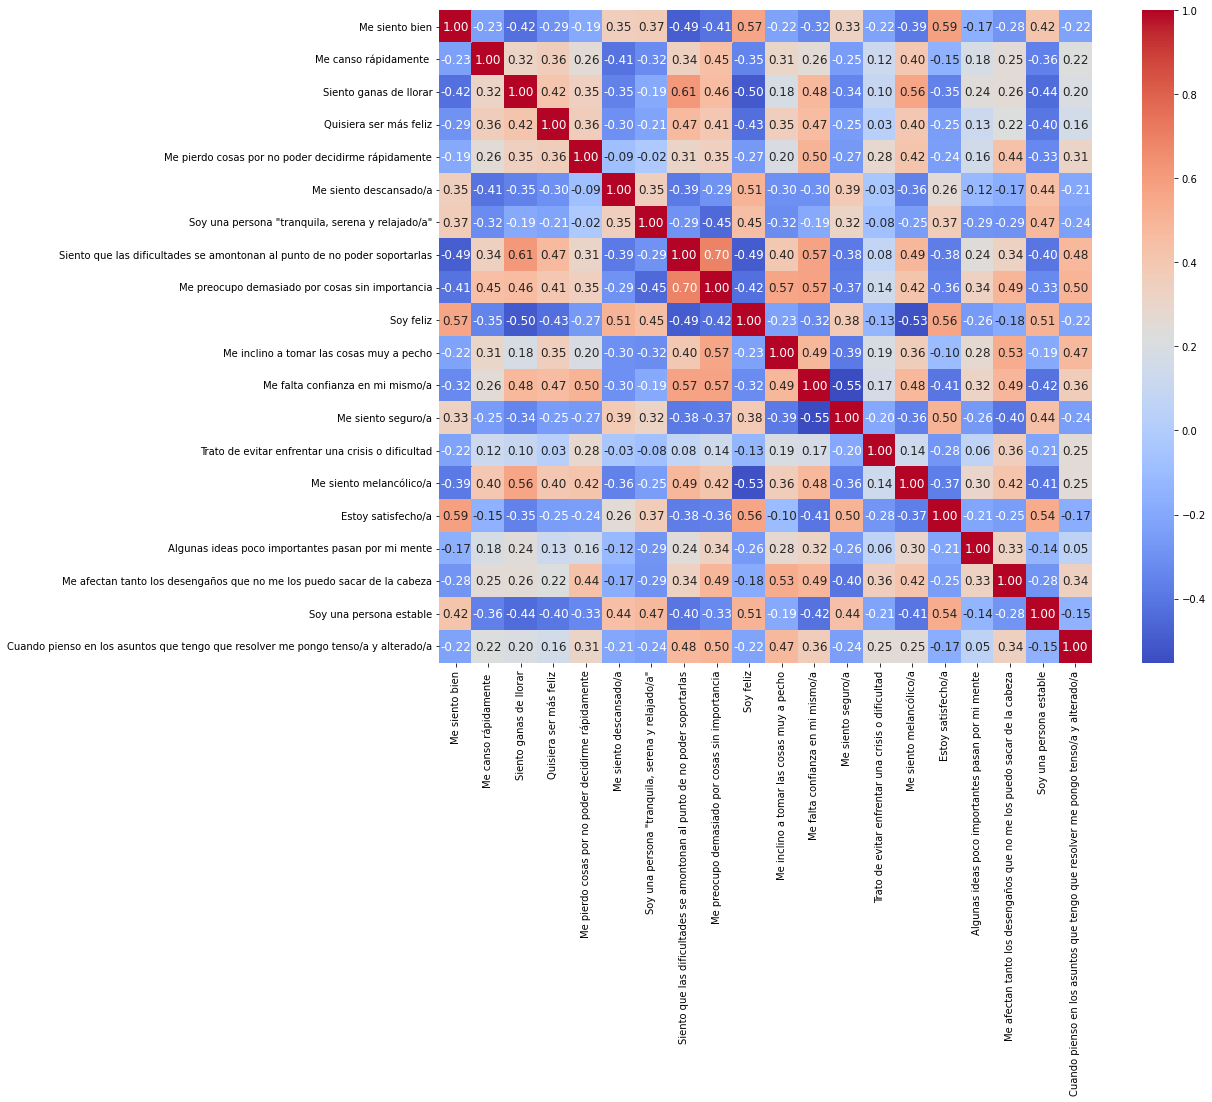

In [6]:
corr = df.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
           xticklabels= corr, yticklabels= corr,
           cmap= 'coolwarm')

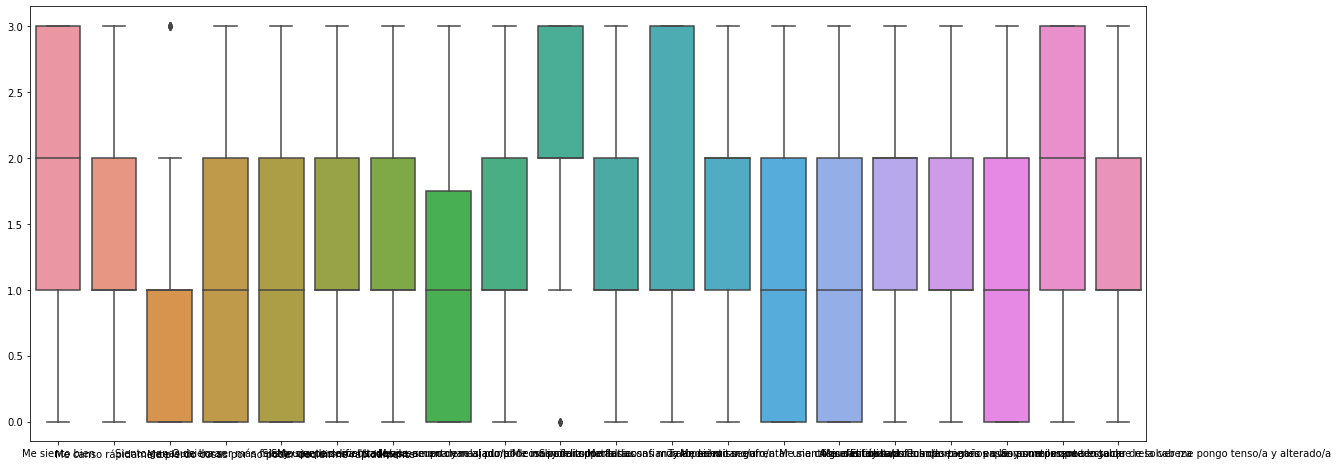

In [7]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def print_hist(data,title, ax):
    '''
        print_hist:
            Función para dibujar el histograma y la distribución de los datos.
    '''
    sns.histplot(data, alpha=0.4, kde=True, ax=ax)
    sns.rugplot(data, color="black", ax=ax)
    
    color = "orange"
    text=f"$\\mu$ = {data.mean():.3f}\n"
    text+=f"$\\sigma$ = {data.std(ddof=1):.3f}"

    bbox = dict(boxstyle='round', fc=color, ec=color, alpha=0.3)
    ax.text(0.72, 0.8, text, fontsize=11, bbox=bbox, transform=ax.transAxes)
    ax.set_title(title)

def print_dataset(df, fig_rows, fig_cols):
    '''
        print_dataset:
            Recibe un DataFrame, dibuja sus distribuciones de datos y cuenta cuántos tienen distribución normal
    '''
    cols = df.columns
    fig, axes = plt.subplots(fig_rows, fig_cols, figsize=((fig_cols*25)//5, (fig_rows*8)//2))
    axes = axes.ravel()

    for col_name, ax in zip(cols, axes):
        print_hist(df[col_name],"Distribución de " + col_name, ax)

    fig.tight_layout()
    plt.show()

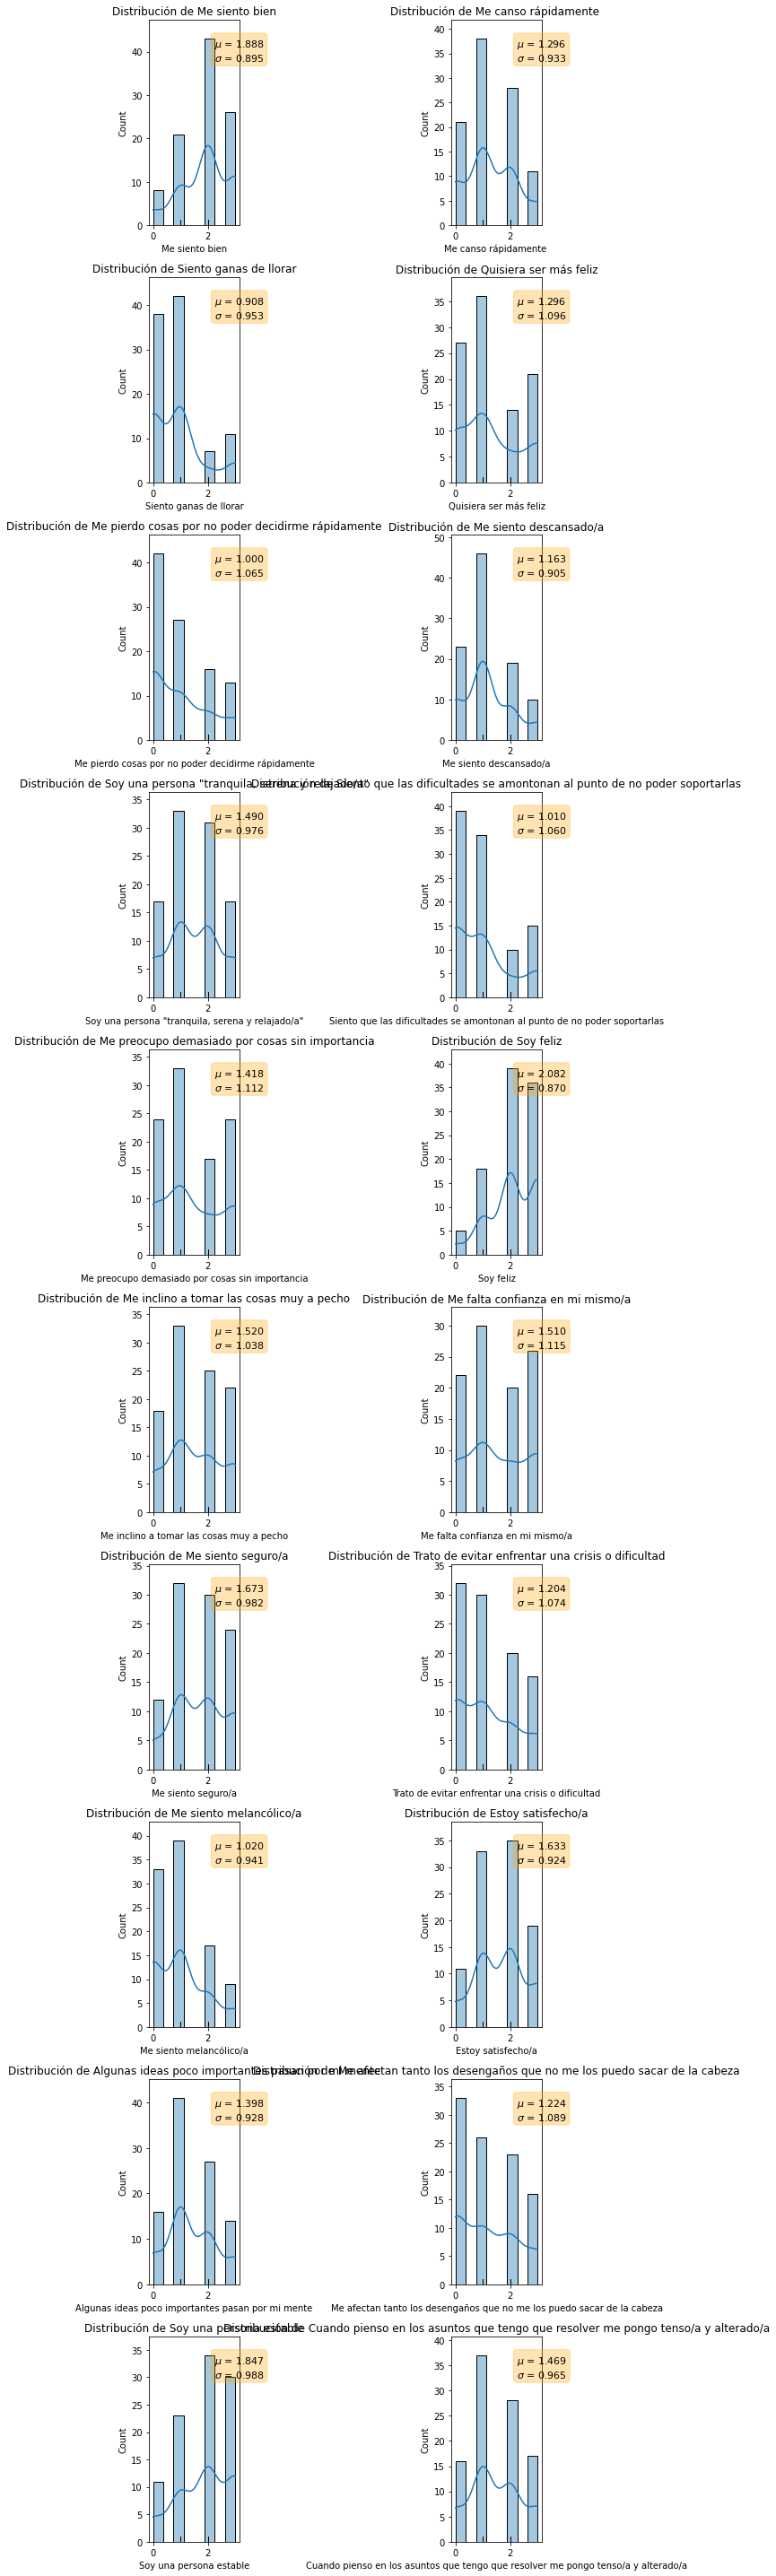

In [10]:
print_dataset(df, 10, 2)

##Normalización
Cuando las distintas características o atributos de un dataset están expresadas en distintas escalas se hace patente la necesidad de normalizar sus valores. Por tanto, aplicamos a los datos una transformación de normalización de forma que su media sea igual a 0, y su varianza=1.

In [11]:
#Aplicamos una transformación de los datos para poder aplicar las propiedades de la distribución normal

from sklearn.preprocessing import StandardScaler
df_std = StandardScaler().fit_transform(df)
df_std = pd.DataFrame(df_std, columns = df.columns)

Se asume que no se tiene una previa categorización respecto al BECK por tanto se aplica Cluster: KMeans para agurpar el comportamiento de los individuos Codo de Jambu

Permite determinar cual es el cluster mas apropiado

In [12]:
from sklearn.cluster import KMeans

wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters=i, max_iter = 300)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

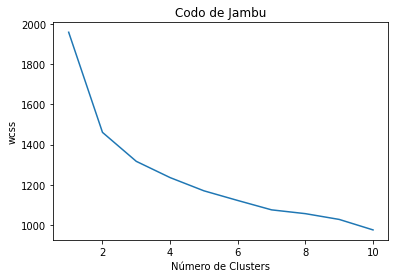

In [13]:
plt.plot(range(1,11),wcss)
plt.title("Codo de Jambu")
plt.xlabel("Número de Clusters")
plt.ylabel("wcss")
plt.show()

Se considera el clúster más apropiado donde la suma de los cuadrados de las distancias deja de caer bruscamente. Para este estudio en particular se tomará el valor de 2.

In [14]:
kmeans = KMeans(n_clusters=5, max_iter = 300, random_state=0).fit(df_std)
kmeans

KMeans(n_clusters=5, random_state=0)

In [15]:
df_std['KMeans_Clusters'] = kmeans.labels_
df_std

,Me siento bien,Me canso rápidamente,Siento ganas de llorar,Quisiera ser más feliz,Me pierdo cosas por no poder decidirme rápidamente,Me siento descansado/a,"Soy una persona ""tranquila, serena y relajado/a""",Siento que las dificultades se amontonan al punto de no poder soportarlas,Me preocupo demasiado por cosas sin importancia,Soy feliz,...,Me falta confianza en mi mismo/a,Me siento seguro/a,Trato de evitar enfrentar una crisis o dificultad,Me siento melancólico/a,Estoy satisfecho/a,Algunas ideas poco importantes pasan por mi mente,Me afectan tanto los desengaños que no me los puedo sacar de la cabeza,Soy una persona estable,Cuando pienso en los asuntos que tengo que resolver me pongo tenso/a y alterado/a,KMeans_Clusters
0,1.248592,-1.396279,-0.957432,-1.188995,-0.94388,0.929660,0.525182,-0.009676,-1.282591,1.061545,...,0.441726,-0.689297,-1.126726,-0.021791,0.399704,-0.431183,-1.130066,0.155702,-0.488698,0
1,0.126005,-0.318835,-0.957432,-1.188995,-0.94388,-0.181397,0.525182,-0.957920,-1.282591,-0.094360,...,-1.361989,1.357707,0.744785,-1.089534,1.487787,-0.431183,-1.130066,0.155702,0.552442,0
2,0.126005,-0.318835,0.096819,0.645989,-0.94388,0.929660,0.525182,-0.009676,0.525955,-0.094360,...,-0.460131,0.334205,-0.190970,-0.021791,0.399704,-0.431183,-1.130066,0.155702,0.552442,1
3,-0.996583,0.758608,0.096819,0.645989,0.00000,-1.292454,-1.533532,1.886812,1.430228,-0.094360,...,1.343584,-0.689297,-0.190970,-0.021791,-0.688379,0.652302,-0.207179,-0.861550,0.552442,2
4,0.126005,-0.318835,-0.957432,-1.188995,0.00000,0.929660,1.554540,-0.957920,-0.378318,1.061545,...,-0.460131,1.357707,-1.126726,-1.089534,0.399704,-0.431183,-1.130066,1.172954,-0.488698,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.126005,-0.318835,-0.957432,-0.271503,0.00000,0.929660,0.525182,-0.957920,-0.378318,-1.250264,...,-0.460131,0.334205,0.744785,-0.021791,-0.688379,-0.431183,-0.207179,0.155702,-0.488698,1
94,1.248592,-0.318835,-0.957432,-1.188995,-0.94388,2.040717,0.525182,-0.957920,-0.378318,1.061545,...,-1.361989,1.357707,-1.126726,-0.021791,1.487787,-1.514668,-1.130066,1.172954,-0.488698,0
95,0.126005,-1.396279,-0.957432,-1.188995,0.00000,-1.292454,-0.504175,-0.957920,-0.378318,-0.094360,...,0.441726,0.334205,-0.190970,-1.089534,0.399704,-0.431183,-0.207179,0.155702,-0.488698,1
96,0.126005,-0.318835,0.096819,0.645989,0.94388,-0.181397,-0.504175,-0.009676,-1.282591,-0.094360,...,0.441726,-0.689297,-0.190970,-0.021791,1.487787,-0.431183,0.715708,-0.861550,1.593582,4


PCA
Principal Component Analysis (PCA) es un método estadístico que permite simplificar la complejidad de espacios muestrales con muchas dimensiones a la vez que conserva su información

In [16]:
# Calculamos la matriz de covarianza

print('NumPy covariance matrix: \n%s' %np.cov(df_std.T))

NumPy covariance matrix: 
[[ 1.01030928 -0.23373621 -0.42715656 -0.2946007  -0.19662447  0.35740915
   0.3739166  -0.49260222 -0.4123079   0.57386143 -0.2272793  -0.32760198
   0.3364963  -0.22476857 -0.39265198  0.59133149 -0.17081517 -0.28336367
   0.42754218 -0.22696725 -0.23701163]
 [-0.23373621  1.01030928  0.3239443   0.36095549  0.26210755 -0.41632825
  -0.32247861  0.34446484  0.45066391 -0.35138043  0.31101623  0.26250022
  -0.25614424  0.1255772   0.40808555 -0.14922591  0.18605111  0.25104787
  -0.36791903  0.22421237  0.35737217]
 [-0.42715656  0.3239443   1.01030928  0.42543059  0.34879315 -0.35659978
  -0.19681113  0.61930978  0.46944473 -0.50585423  0.18615922  0.4860942
  -0.34416304  0.10004276  0.57076876 -0.35839737  0.24236787  0.26099668
  -0.44641729  0.20622292  0.42553772]
 [-0.2946007   0.36095549  0.42543059  1.01030928  0.36604215 -0.30197668
  -0.21618696  0.47271014  0.4094204  -0.43041633  0.35646017  0.47091188
  -0.25684233  0.02727557  0.40809997 -0.250

In [17]:

#Calculamos los autovalores y autovectores de la matriz y los mostramos

cov_mat = np.cov(df_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 1.99526018e-01 -3.01793293e-01 -1.02854619e-01 -1.82064433e-01
   2.16709652e-01 -1.16729962e-01 -1.50484953e-01  5.25203518e-02
  -1.85815456e-02  1.76726753e-01  2.62237240e-01 -1.67991862e-01
   2.59710159e-01 -1.21572342e-01  1.71676370e-01  1.64743287e-01
  -4.40270795e-01 -2.99548236e-01  7.63143238e-02 -4.21705378e-01
   6.89505400e-02]
 [-1.78314890e-01  1.12216902e-01 -2.32356337e-01 -1.58577270e-01
   4.89465075e-03 -2.58430285e-01 -5.40861513e-01  1.80983255e-01
   1.83255780e-02 -1.21807797e-01  1.30413226e-01  4.60766671e-02
  -1.63982019e-03  7.84464834e-02 -1.06631510e-01  2.04817174e-01
   2.67423520e-02 -2.66839726e-01 -3.64523475e-01  3.22888723e-01
  -2.85560943e-01]
 [-2.20690733e-01  1.72139540e-01  1.07051317e-01 -2.93902960e-01
  -1.66306973e-01  2.63809240e-01 -2.43640800e-02  1.27351445e-01
   2.43418135e-01  3.69148748e-02  1.61091405e-01  4.89460404e-01
  -2.48742216e-01  3.53539137e-02  2.67823837e-01  3.14568893e-02
  -1.61239574e-01 -2.866

In [18]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendiente:
8.431899291618162
2.259755398191425
1.3951969232335342
1.3331916885227486
1.0976670128006192
1.0411240150746466
0.952269512228951
0.7273448627807386
0.6521362758525125
0.5985400084109989
0.5517845326544664
0.5335457013181392
0.5005100626987766
0.4312842832897501
0.36713057858693066
0.3121186078310605
0.2917969240709215
0.27446974031157956
0.25117441069483293
0.2021671853061196
0.15771646443051493


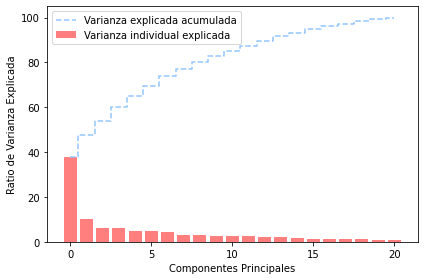

In [20]:
# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(21), var_exp, alpha=0.5, align='center',label='Varianza individual explicada', color='red')
    plt.step(range(21), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()

Generamos un archivo excel que guarde las componente y la etiqueta del metodo de agrupacion KMeans

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df_nor = pca.fit_transform(df_std)
pca_df_nor = pd.DataFrame(data = pca_df_nor, columns = ['Componente_1', 'Componente_2'])
pca_ANSIEDAD = pd.concat([pca_df_nor, df_std[['KMeans_Clusters']]], axis = 1)
pca_ANSIEDAD
#pca_ANSIEDAD.to_excel("pca_ANSIEDAD.xlsx", index = False) Si queremos eliminar el index
pca_ANSIEDAD.to_excel("pca_ANSIEDAD.xlsx")

In [23]:
#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(21,1),
                      eig_pairs[1][1].reshape(21,1)))

print('Matriz W:\n', matrix_w)

Y = df_std.dot(matrix_w)

Matriz W:
 [[ 0.19952602 -0.30179329]
 [-0.17831489  0.1122169 ]
 [-0.22069073  0.17213954]
 [-0.20272912  0.04716077]
 [-0.19668367 -0.24285279]
 [ 0.18594547 -0.2168504 ]
 [ 0.1662229  -0.27781321]
 [-0.25471293  0.09655571]
 [-0.26481689 -0.0375458 ]
 [ 0.22332161 -0.35406963]
 [-0.20645362 -0.16834679]
 [-0.26714585 -0.16960807]
 [ 0.22497423  0.00268429]
 [-0.10420433 -0.10727742]
 [-0.2398909   0.06339174]
 [ 0.2064097  -0.21192976]
 [-0.13618923  0.00946124]
 [-0.2198868  -0.2531701 ]
 [ 0.22029184 -0.22102314]
 [-0.17415925 -0.14436309]
 [-0.36255761 -0.54199612]]


Mostramos la matriz de covarianza

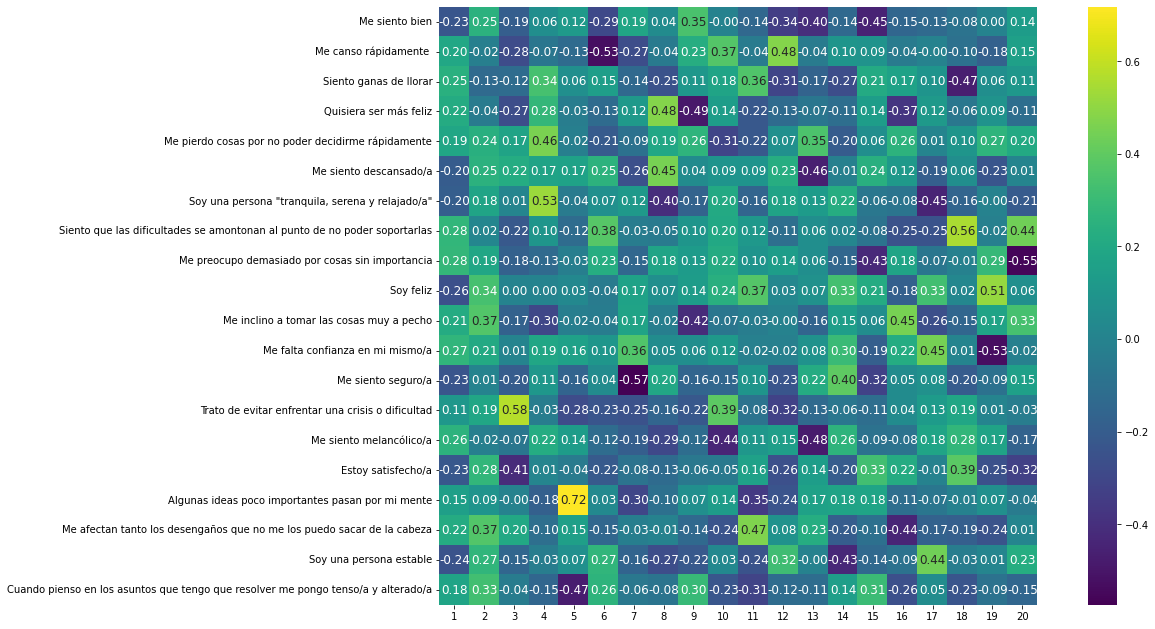

In [24]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
df_pca = make_pipeline(StandardScaler(), PCA())
df_pca.fit(df)

# Se extrae el modelo entrenado del pipeline
modelo_pca = df_pca.named_steps['pca']
componentes = modelo_pca.components_
plt.figure(figsize=(18, 11))
sns.heatmap(componentes.T, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
           xticklabels= np.arange(modelo_pca.n_components_) + 1, yticklabels= df.columns,
           cmap= 'viridis')

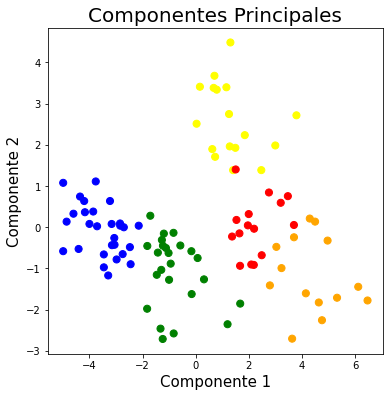

In [25]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes Principales', fontsize = 20)

color_theme = np.array(["blue", "green", "orange","red", "yellow"])
ax.scatter(x = pca_ANSIEDAD.Componente_1, y =pca_ANSIEDAD.Componente_2,
           c=color_theme[pca_ANSIEDAD.KMeans_Clusters], s = 50)
plt.show()